In [1]:
!pip install python-docx transformers sentence-transformers
!apt install tesseract-ocr

!pip install pytesseract


"pip" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


"apt" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"pip" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [2]:
!pip install python-docx transformers sentence-transformers pytesseract --quiet
!apt install tesseract-ocr -y
!pip install python-docx transformers --quiet



"pip" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"apt" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"pip" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [3]:
from docx import Document
from PIL import Image
import pytesseract
import io
import os
import docx
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from transformers import pipeline, AutoTokenizer
import torch

from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM


ModuleNotFoundError: No module named 'pytesseract'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
docx_path = "/content/drive/MyDrive/Colab Notebooks/Praktika/ТЗ.docx"
doc = Document(docx_path)


In [ ]:
def extract_clean_text(docx_path):
    doc = Document(docx_path)
    lines = [p.text.strip() for p in doc.paragraphs if len(p.text.strip()) > 10]
    return "\n".join(lines)

text = extract_clean_text(docx_path)


# ✅ Extract tables
tables = []
for table in doc.tables:
    table_data = []
    for row in table.rows:
        row_data = [cell.text.strip() for cell in row.cells]
        table_data.append(row_data)
    tables.append(pd.DataFrame(table_data))

# ✅ Extract images
images = []
for rel in doc.part._rels.values():
    if "image" in rel.reltype:
        image_data = rel.target_part.blob
        images.append(Image.open(io.BytesIO(image_data)))




In [ ]:
# ✅ Display tables (optional)
for i, df in enumerate(tables):
    print(f"\nTable {i+1}:")
    display(df)



Table 1:


,0,1,2,3,4,5
0,№,Наименование поля,Тип поля,Источник данных,Заполнение,Особое условие
1,1,БН,Выпадающий список,Справочник «БН»,Обязательное,Фильтр списков «№ из ДК (от 2024г.)» и «№ из Д...
2,2,№ из ДК (от 2024г.),Выпадающий список,Справочник «ДК2024»,Не обязательное,"Автозаполнение всех полей, включая «№ из ДК (о..."
3,3,№ из ДК (от 2022г.),Выпадающий список,Справочник «ДК2022»,Не обязательное,"Автозаполнение всех полей, включая «№ из ДК (о..."
4,4,ID проекта,Строка для ввода текста,,Обязательное,
5,5,Наименование проекта,Строка для ввода текста,,Обязательное,
6,6,Уровень проекта,Выпадающий список,Справочник «Уровень проекта»,Не обязательное,
7,8,Исполнитель (Курирующее управление)*,Выпадающий список,Справочник «Организации»,Не обязательное,
8,9,Общий бюджет проекта (млн тенге),Строка для ввода текста,,Не обязательное,
9,10,Бюджет проекта (млн тенге) - МБ,Строка для ввода текста,,Не обязательное,



Table 2:


,0,1,2,3,4
0,№,Наименование поля,Тип поля,Источник данных,Особое условие
1,1,БН,Строка для ввода текста,Справочник «Портфель проектов»,Автозаполнение
2,2,ID проекта,Строка для ввода текста,Справочник «Портфель проектов»,Автозаполнение
3,3,Наименование проекта,Строка для ввода текста,Справочник «Портфель проектов»,Автозаполнение
4,4,Исполнитель (Курирующее управление)*,Строка для ввода текста,Справочник «Портфель проектов»,Автозаполнение



Table 3:


,0,1,2,3,4
0,№,Наименование поля,Тип поля,Источник данных,Особое условие
1,1,№ из ДК (от 2024г.),Строка для ввода текста,Справочник «Портфель проектов»,Автозаполнение
2,2,№ из ДК (от 2022г.),Строка для ввода текста,Справочник «Портфель проектов»,Автозаполнение
3,3,Уровень проекта,Строка для ввода текста,Справочник «Портфель проектов»,Автозаполнение
4,4,БН,Строка для ввода текста,Справочник «Портфель проектов»,Автозаполнение
5,5,Общий бюджет проекта (млн тенге),Строка для ввода текста,Справочник «Портфель проектов»,Автозаполнение
6,6,Сроки реализации,Строка для ввода текста,Справочник «Портфель проектов»,Автозаполнение



Table 4:


,0,1,2,3,4
0,№,Наименование поля,Тип поля,Источник данных,Особое условие
1,1,Бюджет актуальный общий,Строка для ввода текста,,
2,2,Начало актуальное,Дата,,
3,3,Окончание актуальное,Дата,,
4,4,Крупный проект,CheckBox,,True/False
5,5,Смежный БН,Выпадающий список,Справочник «БН»,Множественный выбор
6,6,Администраторы бюджета,Выпадающий список,Справочник «Организации»,Множественный выбор



Table 5:


,0,1,2,3,4
0,№,Наименование поля,Тип поля,Источник данных,Особое условие
1,1,По данным диаграммы Ганта,CheckBox,,True/False
2,2,Стадия/этап,Строка для ввода текста,,
3,3,Статус,Выпадающий список,Справочник «Статус проекта»,
4,4,% выполнения,Строка для ввода текста,,Числовое значение
5,5,Реализация по графику,CheckBox,,True/False
6,6,Задачи по проекту,Строка для ввода текста,,"Архивируется. Отображает как прошлые, так и бу..."
7,7,Комментарий,Поле для ввода текста,,
8,8,Текущий статус задач,Поле для ввода текста,,



Table 6:


,0,1,2,3,4
0,№,Наименование поля,Тип поля,Источник данных,Особое условие
1,1,Формулировка проблемы,Строка для ввода текста,,
2,2,Путь решения,Поле для ввода текста,,
3,3,Примечание или планы (задачи),Поле для ввода текста,,



Image 1:


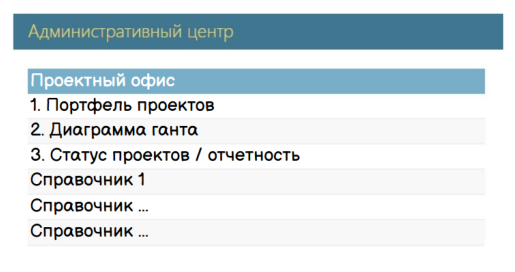


Image 2:


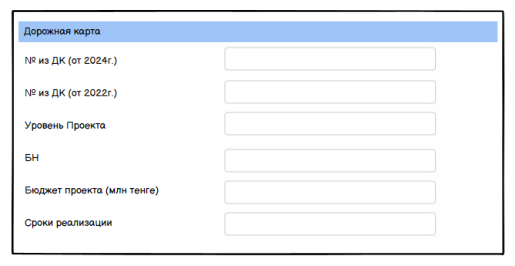


Image 3:


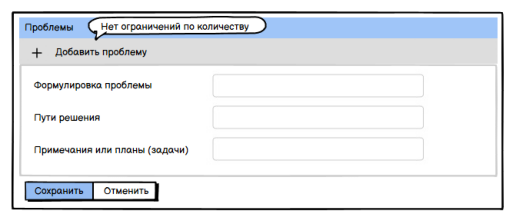


Image 4:


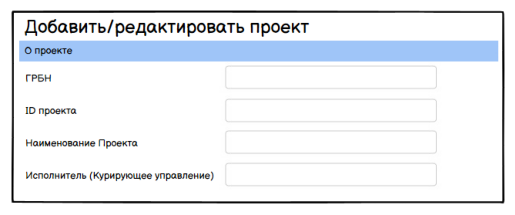


Image 5:


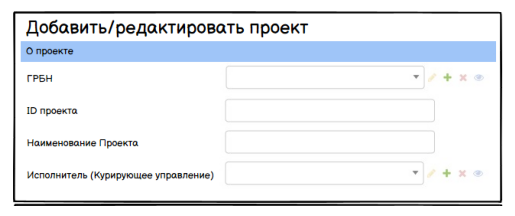


Image 6:


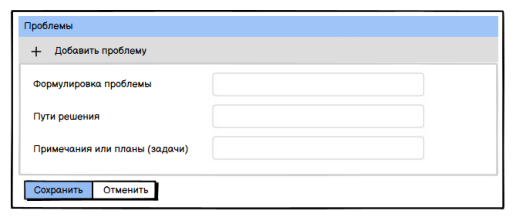


Image 7:


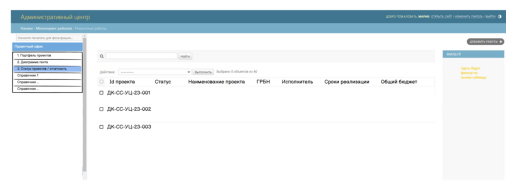


Image 8:


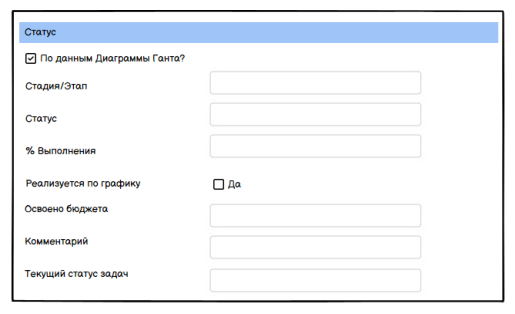


Image 9:


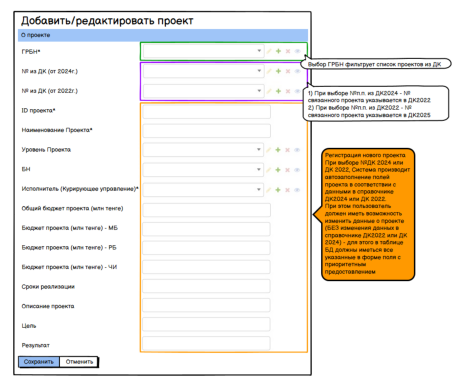


Image 10:


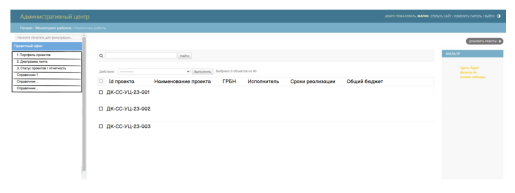


Image 11:


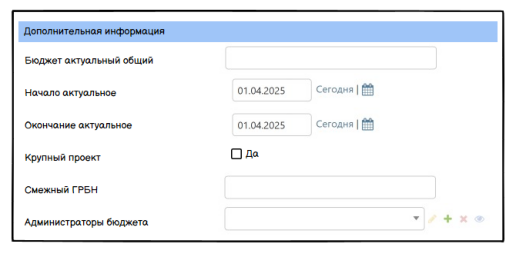

In [ ]:
# ✅ Display images (optional)

for i, img in enumerate(images):
    print(f"\nImage {i+1}:")
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [ ]:
# device = 0 if torch.cuda.is_available() else -1
# print(f"Using device: {'CUDA' if device >= 0 else 'CPU'}")

In [ ]:
base_path = "/content/drive/MyDrive/Colab Notebooks/Praktika/"
image_path = "/content/drive/MyDrive/Colab Notebooks/Praktika/Images"
tables_path = "/content/drive/MyDrive/Colab Notebooks/Praktika/tables"
os.makedirs(image_path, exist_ok=True)
os.makedirs(tables_path, exist_ok=True)

In [ ]:
for i, df in enumerate(tables):
    table_path = os.path.join(tables_path, f"table_{i+1}.xlsx")
    df.to_excel(table_path, index=False)
    print(f"📊 Таблица {i+1} сохранена в:", table_path)


📊 Таблица 1 сохранена в: /content/drive/MyDrive/Colab Notebooks/Praktika/tables/table_1.xlsx
📊 Таблица 2 сохранена в: /content/drive/MyDrive/Colab Notebooks/Praktika/tables/table_2.xlsx
📊 Таблица 3 сохранена в: /content/drive/MyDrive/Colab Notebooks/Praktika/tables/table_3.xlsx
📊 Таблица 4 сохранена в: /content/drive/MyDrive/Colab Notebooks/Praktika/tables/table_4.xlsx
📊 Таблица 5 сохранена в: /content/drive/MyDrive/Colab Notebooks/Praktika/tables/table_5.xlsx
📊 Таблица 6 сохранена в: /content/drive/MyDrive/Colab Notebooks/Praktika/tables/table_6.xlsx


In [ ]:
# ✅ Save images to separate files
for i, img in enumerate(images):
    img_path = os.path.join(image_path, f"image_{i+1}.png")
    img.save(img_path)
    print(f"🖼️ Изображение {i+1} сохранено в:", img_path)

🖼️ Изображение 1 сохранено в: /content/drive/MyDrive/Colab Notebooks/Praktika/Images/image_1.png
🖼️ Изображение 2 сохранено в: /content/drive/MyDrive/Colab Notebooks/Praktika/Images/image_2.png
🖼️ Изображение 3 сохранено в: /content/drive/MyDrive/Colab Notebooks/Praktika/Images/image_3.png
🖼️ Изображение 4 сохранено в: /content/drive/MyDrive/Colab Notebooks/Praktika/Images/image_4.png
🖼️ Изображение 5 сохранено в: /content/drive/MyDrive/Colab Notebooks/Praktika/Images/image_5.png
🖼️ Изображение 6 сохранено в: /content/drive/MyDrive/Colab Notebooks/Praktika/Images/image_6.png
🖼️ Изображение 7 сохранено в: /content/drive/MyDrive/Colab Notebooks/Praktika/Images/image_7.png
🖼️ Изображение 8 сохранено в: /content/drive/MyDrive/Colab Notebooks/Praktika/Images/image_8.png
🖼️ Изображение 9 сохранено в: /content/drive/MyDrive/Colab Notebooks/Praktika/Images/image_9.png
🖼️ Изображение 10 сохранено в: /content/drive/MyDrive/Colab Notebooks/Praktika/Images/image_10.png
🖼️ Изображение 11 сохранено 

In [ ]:
text_path = os.path.join(base_path, "raw_text.txt")
with open(text_path, "w", encoding="utf-8") as f:
    f.write(text)
print("📄 Текст сохранён в:", text_path)

📄 Текст сохранён в: /content/drive/MyDrive/Colab Notebooks/Praktika/raw_text.txt


In [ ]:
# ✅ Load summarization model
model_name = "d0rj/rut5-base-summ"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
summarizer = pipeline("summarization", model=model, tokenizer=tokenizer, device=0 if torch.cuda.is_available() else -1)

KeyboardInterrupt: 

In [ ]:
# ✅ Chunk text for long input
def chunk_text(text, max_tokens=800):
    sentences = text.split('.')
    chunks = []
    current_chunk = ""
    for sentence in sentences:
        if len(current_chunk + sentence) < max_tokens:
            current_chunk += sentence + "."
        else:
            chunks.append(current_chunk.strip())
            current_chunk = sentence + "."
    if current_chunk:
        chunks.append(current_chunk.strip())
    return chunks

In [ ]:
# ✅ Full document summarization
def summarize_large_text(text, chunk_size=800, max_output=200):
    chunks = chunk_text(text, chunk_size)
    summaries = []
    for i, chunk in enumerate(chunks):
        try:
            summary = summarizer(chunk, max_length=max_output, min_length=50, do_sample=False)[0]["summary_text"]
            summaries.append(summary)
        except Exception as e:
            print(f"⚠️ Error in chunk {i}: {e}")
    return "\n\n".join(summaries)

final_summary = summarize_large_text(text)
print("===== Final Summary =====\n", final_summary)


In [ ]:
# ✅ Save summary to .docx
output_path = "/content/drive/MyDrive/Colab Notebooks/Praktika/final_summary.docx"
out_doc = Document()
out_doc.add_heading("Итоговая сводка документа", level=1)
out_doc.add_paragraph(final_summary)
out_doc.save(output_path)
print("📄 Сводка сохранена в:", output_path)

📄 Сводка сохранена в: /content/drive/MyDrive/Colab Notebooks/Praktika/final_summary.docx


In [ ]:
# ✅ Question-based summarization
def summarize_with_request(text, question, chunk_size=700):
    chunks = chunk_text(text, chunk_size)
    answers = []
    for chunk in chunks:
        prompt = question + "\n\n" + chunk
        try:
            answer = summarizer(prompt, max_length=180, min_length=50, do_sample=False)[0]["summary_text"]
            answers.append(answer)
        except Exception as e:
            print("⚠️ Error in question-based summarization:", e)
    return "\n\n".join(answers)

# Example question
question = "Цель и виды услуг"
detailed_answer = summarize_with_request(text, question)
print("❓ Вопрос:", question)
print("📝 Ответ:", detailed_answer)

Your max_length is set to 180, but your input_length is only 159. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=79)
Your max_length is set to 180, but your input_length is only 103. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)
Your max_length is set to 180, but your input_length is only 103. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)
Your max_length is set to 180, but your input_length is only 73. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=36)
Y

❓ Вопрос: Цель и виды услуг
📝 Ответ: Закупка услуг по сопровождению системы мониторинга ключевых показателей развития города Алматы (Ситуационный центр) осуществляется в соответствии с договором No2 к договору No____ от «____________________________________________________________________________________________________________________________________(((ы) от «________»

SMmarize: Smart City - концепция интеграции нескольких ИКТ и Интернета вещей (IoT решения) для управления городским имуществом. City - стратегия интеграции между ИКT и Интернетом вещей (ИКТ) и интернетом вещей.

В 2015 году Генеральной ассамблеей ООН в качестве «плана достижения лучшего и более устойчивого будущего для всех» была разработана стратегия развития «умного города», разработанная в 2015 году Генассамблией ООН по итогам 2015 года.

Система видеомониторинга города Алматы, Единая транспортная сеть государственных органов и единая автомобильная сеть госслужащих в Алмате, внесенная в резиденцию Генассамблеи «Пове